In [5]:
#from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import zipfile
import torch
import torch.nn as nn
import torch.nn.functional as F
import tabulate
import glob
from PIL import Image  # or any other library for image processing


In [3]:
import sys
print(sys.executable)

C:\Users\salma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [5]:
import torch

if torch.cuda.is_available():
    print("CUDA is available! Running on GPU.")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is not available. Running on CPU.


In [1]:
import torch
print(torch.cuda.is_available())  # Returns True if CUDA is available
print(torch.cuda.get_device_name(0))  # Prints the GPU name if CUDA is available

False


AssertionError: Torch not compiled with CUDA enabled

In [7]:
folder_path = 'D://Si-Ware//Spider_plots//3h_1122_spider_plots'  
image_files = glob.glob(os.path.join(folder_path, '*.png'))  # You can adjust the extension to match your image formats

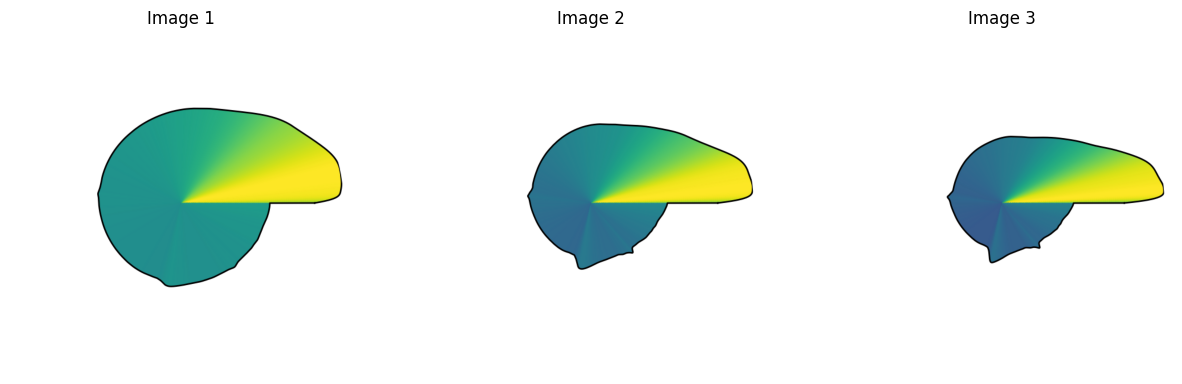

In [9]:
plt.figure(figsize=(15, 5))

# Show the first 3 images
for i, image_path in enumerate(image_files[:3]):
    img = Image.open(image_path)  # Open the image using PIL
    plt.subplot(1, 3, i + 1)  # Create a subplot (1 row, 3 columns)
    plt.imshow(img)  # Display the image
    plt.title(f"Image {i + 1}")  # Title for each image
    plt.axis('off')  # Turn off axis for better display

plt.show()

In [11]:
df = pd.read_csv('D://Si-Ware//LUCAS.SOIL_corr.csv')
# Images path '/content/drive/MyDrive/Si-Ware/3h_1121_spider_plots'
print(df.shape)
df.head()

C:\Users\salma\AppData\Local\Temp\ipykernel_10324\3062311938.py:1: DtypeWarning: Columns (1,2,4216,4231,4234,4237,4274) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D://Si-Ware//LUCAS.SOIL_corr.csv')


(19036, 4288)


,Unnamed: 0,sample.ID,ID,date,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,...,WRBLV1,WRBADJ1,PARMADO1,PARMADO2,PARMADO3,PARMASE1,PARMASE2,PARMASE3,MIN_TOP,mineral
0,4,100,100,2011-01-24 16:02:25,0.831705,0.839111,0.846473,0.853773,0.860988,0.868098,...,CM,dy,3.0,31.0,310.0,5.0,56.0,561.0,KQ,mineral
1,5,1000,1000,2010-09-30 14:50:01,0.706027,0.714901,0.723727,0.732480,0.741142,0.749684,...,CM,dy,3.0,31.0,311.0,3.0,31.0,310.0,KQ,mineral
2,6,10000,10000,2010-10-19 12:06:16,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,...,CM,ca,2.0,21.0,214.0,0.0,0.0,0.0,MS,mineral
3,7,10001,10001,2010-10-19 15:00:01,0.698136,0.706548,0.714909,0.723197,0.731384,0.739448,...,CM,dy,3.0,31.0,310.0,4.0,42.0,420.0,KQ,mineral
4,8,10002,10002,2011-04-30 12:26:27,0.675433,0.684820,0.694163,0.703438,0.712620,0.721693,...,LV,ha,7.0,71.0,710.0,6.0,62.0,620.0,M,mineral


In [12]:
spc_columns = [col for col in df.columns if col.startswith('spc')]
spc_df = df[spc_columns]
display(spc_df.head())

,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,spc.403,spc.403.5,spc.404,spc.404.5,...,spc.2495,spc.2495.5,spc.2496,spc.2496.5,spc.2497,spc.2497.5,spc.2498,spc.2498.5,spc.2499,spc.2499.5
0,0.831705,0.839111,0.846473,0.853773,0.860988,0.868098,0.875088,0.881935,0.888626,0.895142,...,0.552283,0.552303,0.552319,0.552333,0.552342,0.552346,0.552345,0.552338,0.552329,0.552314
1,0.706027,0.714901,0.723727,0.732480,0.741142,0.749684,0.758085,0.766323,0.774371,0.782215,...,0.424424,0.424536,0.424642,0.424742,0.424837,0.424924,0.425009,0.425088,0.425165,0.425256
2,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,0.726321,0.735840,0.745154,0.754237,...,0.426412,0.426590,0.426763,0.426931,0.427094,0.427254,0.427409,0.427561,0.427712,0.427900
3,0.698136,0.706548,0.714909,0.723197,0.731384,0.739448,0.747365,0.755111,0.762668,0.770012,...,0.593780,0.594077,0.594368,0.594653,0.594935,0.595211,0.595482,0.595749,0.596013,0.596341
4,0.675433,0.684820,0.694163,0.703438,0.712620,0.721693,0.730629,0.739405,0.748003,0.756403,...,0.401095,0.401195,0.401289,0.401380,0.401467,0.401554,0.401637,0.401720,0.401801,0.401902


In [14]:
concen_columns = ['OC', 'N', 'CEC', 'pH.in.H2O', 'sand', 'clay']
concen_df = df[concen_columns]
display(concen_df.head())

,OC,N,CEC,pH.in.H2O,sand,clay
0,91.1,5.3,7.2,4.00,48.0,7.0
1,21.4,2.1,13.0,6.53,60.0,13.0
2,15.6,1.4,24.6,7.14,8.0,40.0
3,19.8,1.6,20.6,4.83,56.0,26.0
4,33.5,2.6,15.0,5.74,37.0,22.0


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNWrapper(nn.Module):
    def __init__(self, mode="1d", input_length=4200, img_size=65, num_classes=1):
        super(CNNWrapper, self).__init__()
        self.mode = mode

        if mode == "1d":
            # 1D layers
            self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
            self.pool1d = nn.MaxPool1d(2)
            self.conv2 = nn.Conv1d(64, 128, 3, padding=1)
            self.pool1d = nn.MaxPool1d(2)
            self.conv3 = nn.Conv1d(128, 256, 3, padding=1)
            self.conv4 = nn.Conv1d(256, 256, 3, padding=1)
            self.pool1d = nn.MaxPool1d(2)
            self.conv5 = nn.Conv1d(256, 512, 3, padding=1)
            self.conv6 = nn.Conv1d(512, 512, 3, padding=1)
            self.pool1d = nn.MaxPool1d(2)
            self.conv7 = nn.Conv1d(512, 512, 3, padding=1)
            self.conv8 = nn.Conv1d(512, 512, 3, padding=1)
            self.pool1d = nn.MaxPool1d(2)

            # flatten size: input_length // (2^5) after 5 poolings
            flatten_dim = (input_length // (2**5)) * 512
            self.fc = nn.Linear(flatten_dim, num_classes)

        elif mode == "2d":
            # 2D layers
            self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
            self.pool2d = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
            self.pool2d = nn.MaxPool2d(2, 2)
            self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
            self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
            self.pool2d = nn.MaxPool2d(2, 2)
            self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
            self.conv6 = nn.Conv2d(512, 512, 3, padding=1)
            self.pool2d = nn.MaxPool2d(2, 2)
            self.conv7 = nn.Conv2d(512, 512, 3, padding=1)
            self.conv8 = nn.Conv2d(512, 512, 3, padding=1)
            self.pool2d = nn.MaxPool2d(2, 2)

            # flatten size: (65x65 → ~2x2 after 5 poolings)
            flatten_dim = 512 * 2 * 2
            self.fc = nn.Linear(flatten_dim, num_classes)

        else:
            raise ValueError("mode must be '1d' or '2d'")

    def forward(self, x):
        if self.mode == "1d":
            x = F.relu(self.conv1(x)); x = self.pool1d(x)
            x = F.relu(self.conv2(x)); x = self.pool1d(x)
            x = F.relu(self.conv3(x)); x = F.relu(self.conv4(x)); x = self.pool1d(x)
            x = F.relu(self.conv5(x)); x = F.relu(self.conv6(x)); x = self.pool1d(x)
            x = F.relu(self.conv7(x)); x = F.relu(self.conv8(x)); x = self.pool1d(x)
            x = x.view(x.size(0), -1)
            return self.fc(x)

        elif self.mode == "2d":
            x = F.relu(self.conv1(x)); x = self.pool2d(x)
            x = F.relu(self.conv2(x)); x = self.pool2d(x)
            x = F.relu(self.conv3(x)); x = F.relu(self.conv4(x)); x = self.pool2d(x)
            x = F.relu(self.conv5(x)); x = F.relu(self.conv6(x)); x = self.pool2d(x)
            x = F.relu(self.conv7(x)); x = F.relu(self.conv8(x)); x = self.pool2d(x)
            x = x.view(x.size(0), -1)
            return self.fc(x)

In [ ]:
model_1d = CNNWrapper(mode="1d", input_length=spc_df.shape[1])
X = torch.tensor(spc_df.values, dtype=torch.float32).unsqueeze(1)  # [N, 1, L]
y = torch.tensor(concen_df.values, dtype=torch.float32)
out = model_1d(X)

In [ ]:
model_2d = CNNWrapper(mode="2d", img_size=65)
X = torch.tensor(concen_df.values.reshape(-1, 1, 65, 65), dtype=torch.float32)
out = model_2d(X)

In [ ]:
# Example results after evaluation (replace with actual computed metrics)
results = {
    "Soil properties": ["OC", "N", "CEC", "pH", "Sand", "Clay"],

    "Raw_1DCNN_RMSE": [26.34, 2.28, 10.39, 0.88, 19.52, 8.56],
    "Raw_1DCNN_R2":   [0.91, 0.81, 0.56, 0.76, 0.60, 0.72],

    "CR_2DCNN_RMSE": [24.20, 2.09, 9.53, 0.64, 18.95, 7.49],
    "CR_2DCNN_R2":   [0.93, 0.87, 0.64, 0.85, 0.62, 0.79],

    "GASF_2DCNN_RMSE": [24.89, 1.94, 9.52, 0.63, 17.86, 7.85],
    "GASF_2DCNN_R2":   [0.92, 0.86, 0.70, 0.87, 0.61, 0.77],

    "MTF_2DCNN_RMSE": [27.42, 2.62, 13.35, 0.78, 21.96, 12.19],
    "MTF_2DCNN_R2":   [0.86, 0.76, 0.51, 0.71, 0.43, 0.62],

    "GADF_2DCNN_RMSE": [24.18, 1.82, 8.71, 0.60, 18.41, 7.24],
    "GADF_2DCNN_R2":   [0.93, 0.89, 0.78, 0.88, 0.63, 0.80],
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Display nicely
print(tabulate.tabulate(df_results, headers='keys', tablefmt='pretty'))

# Or show as DataFrame in notebook
# df_results